<a href="https://colab.research.google.com/github/krmiddlebrook/intro_to_deep_learning/blob/master/machine_learning/lesson%203%20-%20Neural%20Networks/intro-to-neural-networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to Neural Networks
<figure><img src='https://mk0analyticsindf35n9.kinstacdn.com/wp-content/uploads/2018/12/nural-network-banner.gif' width='70%'></img><figcaption>A Feed Forward Neural Network</figcaption>
</figure>



In the previous lesson, we introduced the softmax regression method to solve multi-class classification tasks, implementing a classifer to recognize 10 handwritten digits from the MNIST digits dataset. 

We've come a long way and covered many concepts throughout this series, with each lesson building on the previous material. We've learned how to clean data, create linear models (via linear regression), coerce model outputs into a valid probability distribution (via logistic and softmax regression), train models using Sklearn and Tensorflow, apply the appropriate loss function, and to minimize it with respect to our model's parameters (via optimization algorithms). Now that we have a healthy understanding of these concepts in the context of simple linear models, we are ready to explore neural networks--one of the most exciting and successful methods in modern machine learning! 

In this lesson, we describe deep linear neural networks at a high level, focusing on their structure, and demonstrate how to build one using Tensorflow. 

To make this lesson more approachable, we don't cover every detail about neural networks here, but we aim to provide enough information for you to create your own  neural networks and to inspire you to explore deep learning in more detail.  
 
Lesson roadmap: 
- High level introduction to *neural networks*.
- Building neural networks in Python - recreating the feed forward neural network model in 3Blue1Brown's excellent video [But what is a Neural Network? | Deep learning, chapter 1](https://www.youtube.com/watch?v=aircAruvnKk&t=436s) and training it to classify handwritten digits. As you will see, this simple feed forward neural network achieves impressive results. 




## Neural Networks
Although neural networks only recently became popular, they've been around for quite some time. In fact, they first appeared in machine learning research way back in the late 1950s! But they didn't become popular until after 2012, when researchers built a neural network to classify different kinds of labeled images, achieving groundbreaking results (see [ImageNet Classification with Deep Convolutional
Neural Networks](http://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf)). Since then, neural networks have become widely used in machine learning. Neural networks are successful, in part, because they can effectively learn representations of complex data (e.g., images, text, sound, tabular, etc.), especially given enough data and computing power.    

At a high level, there are three fundemental types of neural networks: 1) encoders, 2) decoders, or 3) a combination of both. We will focus on *encoders*. 

Encoder networks take in some input data (i.e., images, texts, sounds, etc.) and output *predictions*, just like the linear models we've been working with. The simplest type of neural networks are called feed forward neural networks (FFNNs), and they consist of many *layers* of *neurons* each *fully-connected* to those in the layer below (from which they receive input) and those above (which they, in turn, influence). 

FFNNs may sound complex right now, but hang in there. In many ways FFNNs are the superpowered version of the linear models we already know about. Like the linear models we've discussed (linear/logistic/softmax regression), neural networks can be configured to solve different kinds of tasks: either *regression* or *classification*. 


Here are some quick facts about neural networks:
- They are effective models for learning to represent complex data (like images, text, sound, tabular, etc.).
- Encoder-based networks, which take input data and output predictions, are probably the most common neural networks - they are useful for classification and regression tasks
- Feed forward neural networks (FFNNs) are the simplest type of neural network. They consist of many *layers* of *neurons* each *fully-connected* to those in the layer below (from which they receive input) and those above (which they, in turn, influence). 
- FFNNs are like linear models on steriods. They have many more parameters than simple linear models, which enables them to learn more complex relationships from the input data. 
- Even though FFNNs are the simplest kind of neural network, they can be very effective. 



**Challenge:** What are two tasks that you think encoder networks might be at good at solving?

### Feed Forward Neural Networks
<figure><img src='https://thumbs.gfycat.com/WeepyConcreteGemsbok-size_restricted.gif' width='100%'></img><figcaption>A Feed Forward Neural Network | <em>Source: <a href='https://www.youtube.com/watch?v=aircAruvnKk&t=436s'>3Blue1Brown - But what is a Neural Network? Deep Learning Part 1</a></em></figcaption>
</figure>

Did you watch the [3Blue1Brown video on neural networks](https://www.youtube.com/watch?v=aircAruvnKk&t=436s)? If you haven't yet, I highly recommend checking it out (feel free to rewatch it too, it's a great overview of neural networks). I'll frequently be referencing important concepts that the video talks about. 

In the following sections, we will summarize the key concepts behind neural networks. First, we describe the motivation and inspiration behind neural networks. Then, we dive into the structure of neural networks, outlining a few critical pieces that make them work. 

*Note, we describe these concepts from the perspective of a feed forward neural network. That said, the fundemental ideas discussed generalize to almost every type of neural network.*

#### Neural Networks: Neural Network $=$ Brain?
<figure><img src='https://github.com/BreakoutMentors/Data-Science-and-Machine-Learning/blob/master/images/neural-network-brain-pizza-yoda-analogy.png?raw=true' width='75%'></img><figcaption>"Pizza, I like" - Yoda</figcaption>
</figure>


No, neural networks $\neq$ brains.
While neural networks don't actually operate like brains, they were inspired by them. 

Let's consider an extremely oversimplified version of the brain. The brain is an organ that uses neurons to process information and make decisions. The neurons are what the brain uses to process data (i.e., information about the world). When some piece of data is sent to a neuron it activates (or dpesn't). The magnitude/strength (i.e., positive or negative) of the activation triggers other groups of neurons to activate (or not). Eventually, this process outputs a decision--based on a combination of the prior triggers and activations--as a response to the input data. As an example, let's say there is a pizza in the kitchen and my nose picks up the scent. The smell of freshly baked dough and melted cheese activates my "I'm hungry neurons". Eventually, I can't ignore these neurons any longer, so I run to the kitchen and eat some pizza.


#### Neural Networks: Neurons
<figure><img src='https://github.com/BreakoutMentors/Data-Science-and-Machine-Learning/blob/master/images/neuron-3blue1brown.png?raw=true' width='75%'></img><figcaption>Neural Networks: Neuron | <em>Source: <a href='https://www.youtube.com/watch?v=aircAruvnKk&t=436s'>3Blue1Brown - But what is a Neural Network? Deep Learning Part 1</a></em></figcaption>
</figure>

**Neurons** are at the core of neural networks (after all, they are practically in the name). At a high level, a neuron holds a corresponding value (i.e., number) called an **activation**. The activation can be represented by a tiny value, a large value, or a value somewhere in between. A neuron is "lit up" (i.e., activated) when its corresponding activation is large, and it is "dim" (i.e., not very activated) when its activation is small. Connecting this to the pizza example, my "I'm hungry neurons" lit up after I smelled the pizza in the kitchen.    



#### Neural Networks: Layers
<figure><img src='https://miro.medium.com/max/1280/1*_nTmA2RowzQBCqI9BVtmEQ.gif' width='75%'></img><figcaption>The Neural Network's Secret Sauce: Stacking Layers | <em>Source: <a href='https://www.youtube.com/watch?v=aircAruvnKk&t=436s'>3Blue1Brown - But what is a Neural Network? Deep Learning Part 1</a></em></figcaption>
</figure>

The secret sauce driving neural networks is the technique of *stacking layers*. At a high level, this method enables the neural network to learn an effective representation of the data. The layers that are in between the input layer and the output layer are called *hidden layers*.

A **layer** is composed of a set of **neurons**. We can manually configure the number of neurons we want to have in each layer, except for in the first and last ones. When we add more neurons and layers to the model, we add more parameters (weights and biases) to it. As a result, larger models (models with many parameters) can be computationally expensive, but very effective. This creates a trade-off between computation effeciency and model representation ability (making smaller models as effective as bigger ones is an active area of research). 

For classification tasks, the number of neurons in the last layer is determined by the number of categories/classes in the dataset. While in regression tasks, there is generally only one neurons in the final layer, since we are predicting a continuous value (e.g., the happiness score for a particular country). 

**Challenge:** In the above figure (from previous cell), how many layers are in the neural network? How many are hidden layers? How many neurons are in the first layer? How many are in the last layer? 

#### Neural Networks: Weights & Activation Functions 
<figure><img src='https://thumbs.gfycat.com/BabyishGeneralFruitfly-size_restricted.gif' width='65%'></img><figcaption>Calculating a Neuron's Activation: Connections and Weights (1) | <em>Source: <a href='https://www.youtube.com/watch?v=aircAruvnKk&t=436s'>3Blue1Brown - But what is a Neural Network? Deep Learning Part 1</a></em></figcaption>
</figure>

<figure><img src='https://thumbs.gfycat.com/GlitteringCavernousGoosefish-small.gif' width='65%'></img><figcaption>Calculating a Neuron's Activation: Connections and Weights (2)| <em>Source: <a href='https://www.youtube.com/watch?v=aircAruvnKk&t=436s'>3Blue1Brown - But what is a Neural Network? Deep Learning Part 1</a></em></figcaption>
</figure>

Neural networks pass information through the network using connections between pairs of neurons in adjacent layers. Each connection has a corresponding **weight** parameter that is learned during the model training phase. As shown in the figure above, the activation of a neuron in a subsequent layer is determined by the *weighted sum* of the weights and activations of the neurons in the previous layer (i.e., connections). A **bias** term is added at the end of the weighted sum to control how large/small a neuron's weighted sum must be to activate. Before the neuron receives a final activation value, the weighted sum is *squeezed* by an **activation function**. 

Activation functions and parameters (weights and biases)may sound intimidating. Fortunately, you already know a lot about these concepts: 1) the *sigmoid* and *softmax* logit functions are examples of activation functions, 2) linear models (linear/logistic/softmax) use the same *weighted sum* method to activate neurons in subsequent layers, the difference is these networks only have one layer after the input. 

As you may remember from the logistic and softmax lessons, these logit functions convert the inputs to a valid probability space. An activation function, more generally, can be defined as any function that transforms the neuron output. It is common to choose an activation function that normalizes the input between 0 and 1 or -1 and 1. 


Activation functions play a critical role in building effective deep neural networks. They can help the network converge quickly (find the right parameters) and improve the model's overall performance. 

In the diagrams above, the second layer has one neuron. This neuron is connected to every other neuron in the previous layer. Consequently, it has 784 connections plus one bias term. That's a lot of number crunching! For this reason, we generally select activation functions that can be computed effeciently (quickly). 

<figure><img src='https://github.com/BreakoutMentors/Data-Science-and-Machine-Learning/blob/master/images/sigmoid-activation-3Blue1Brown.png?raw=true' width='65%'></img><figcaption>Calculating a Neuron's Activation: Sigmoid Activation Function (2)| <em>Source: <a href='https://www.youtube.com/watch?v=aircAruvnKk&t=436s'>3Blue1Brown - But what is a Neural Network? Deep Learning Part 1</a></em></figcaption>
</figure>

So far we've only discussed connections and activations in the context of one neuron in a subsequent layer. But, most layers have many neurons. The good news is, we calculate neuron activations in the same way as before. The bad news is, we have to repeat the calculation process many times over. For example, in the diagrams below we see that all 16 neurons in the 2nd layer are connected to every other neuron in the 1st layer (i.e., 784 neurons). Thus, we need to  perform $784\times16$ weights $ + 16$ biases calculations to get the activations for the 16 neurons in the 2nd layer. Doing this by hand would be way too difficult, but luckily, we can make computers do most of the heavy lifting. 

<figure><img src='https://github.com/BreakoutMentors/Data-Science-and-Machine-Learning/blob/master/images/2-layer-weights-biases-connections-3Blue1Brown.png?raw=true' width='65%'></img><figcaption>Calculating a Neuron's Activation: Sigmoid Activation Function (2) | <em>Source: <a href='https://www.youtube.com/watch?v=aircAruvnKk&t=436s'>3Blue1Brown - But what is a Neural Network? Deep Learning Part 1</a></em></figcaption>
</figure>


**Challenge:** In the below neural network diagram, how many weights and biases are there between the 2nd layer and the 3rd layer? How many total weights and biases are there in the entire network? Hint: all neurons are connected to every other neuron in the previous layer. 

<figure><img src='https://thumbs.gfycat.com/DeadlyDeafeningAtlanticblackgoby-poster.jpg' width='65%'></img><figcaption>A Neural Network: Total Weights & Biases | <em>Source: <a href='https://www.youtube.com/watch?v=aircAruvnKk&t=436s'>3Blue1Brown - But what is a Neural Network? Deep Learning Part 1</a></em></figcaption>
</figure>

## Building a Neural Network: Summary
Now that we know a little about neural networks, it's time to make our own! In this section, we demonstrate how to build a neural network in Python using Tensorflow. Specifically, we implement the neural network from 3Blue1Brown's video [But what is a Neural Network? Deep Learning Part 1](https://www.youtube.com/watch?v=aircAruvnKk&t=436s) to classify 10 types of handwritten digits from the MNIST dataset. Before we start, let's summarize what we know so far about neural networks:
- *Stacking layers* is their secret sauce - enabling the model to learn an effective representations of the data (most of the time).
- Layers are comprised of *neurons*. We configure the number of neurons in *hidden layers*. 
- Neurons hold a corresponding *activation* - large activations "light up" neurons.   
- The activations of neurons are determined by the weighted sum of their *connections* with the previous layer's neurons - quantified by *weights* and a *bias* term. The resulting output is then squeezed by an *activation function* such as the *sigmoid* function.
- For classification tasks, the number of neurons in the last layer corresponds to the number of classes/categories in the dataset.    

Now, it's time to make our first neural network!

### Classification of Handwritten Digits with a Feed Forward Neural Network
<figure><img src='https://thumbs.gfycat.com/ViciousUnnaturalAmethystsunbird-max-1mb.gif' width='75%'></img><figcaption>A Neural Network: Total Weights & Biases | <em>Source: <a href='https://www.youtube.com/watch?v=aircAruvnKk&t=436s'>3Blue1Brown - But what is a Neural Network? Deep Learning Part 1</a></em></figcaption>
</figure>

In this section, we will recreate the feed forward neural network (FFNN) from 3Blue1Brown's video [But what is a Neural Network? Deep Learning Part 1](https://www.youtube.com/watch?v=aircAruvnKk&t=436s) and use it to classify handwritten digits from the MNIST dataset. This process involves several steps: 1) [loading the dataset](#-Step-1:-Loading-the-Dataset), 2) [building the model](#-Step-2:-Building-the-Model), 3) [training the model](#-Step-3:-Training-the-Model), 4) [testing the model](#-Step-4:-Testing-the-Model).



### Prerequisites: Google Colab + building neural networks in python 
We recommend that you run this this notebook in the cloud on Google Colab, if you're not already doing so. It's the simplest way to get started. Google Colab gives you free access to specialized compute resources called [GPUs](https://en.wikipedia.org/wiki/Graphics_processing_unit) and [TPUs](https://en.wikipedia.org/wiki/Tensor_processing_unit). In modern machine learning these resources are frequently used because they significantly speed up model training compared to using [CPUs](https://en.wikipedia.org/wiki/Central_processing_unit) (your computer is probably using CPUs). At a high level, GPUs and TPUs are special types of computer chips that excel at performing computations on large matrices. They perform mathematical matrix operations like multiplication, addition, subtraction, etc. at a much higher rate (i.e., speed) than CPUs.    

Native Python code won't run on GPUs and TPUs because they use specialized operating system *kernels*. We could convert our code to a language that these kernals can understand, but that would be a very tedious and frustrating process. Fortunately, there are several open-source Python libraries exist that do the heavy lifting for us. In particular, the two most popular open-source libraries are [PyTorch](https://pytorch.org/) and [Tensorflow](https://www.tensorflow.org/). These libraries enable us to build custom neural networks in Python that can run on GPUs and TPUs! 

In this lesson we will use Tensorflow because it is a bit easier to use (while you are learning about neural networks) and it comes preinstalled in Google Colab. It is also possible to [install TensorFlow locally](https://www.tensorflow.org/install/). But, the simple solution is normally best (i.e., use Google Colab).
 
[tf.keras](https://www.tensorflow.org/guide/keras) is the simplest way to build and train neural network models in TensorFlow, so we will use it throughout this lessons.

Note that there's [tf.keras](https://www.tensorflow.org/guide/keras) (comes with TensorFlow) and there's [Keras](https://keras.io/) (standalone). You should be using [tf.keras](https://www.tensorflow.org/guide/keras) because 1) it comes with TensorFlow so you don't need to install anything extra and 2) it comes with powerful TensorFlow-specific features.

Lastly, to accelerate model training time, you may want to run this notebook on a GPU in Google Colab. To do this, click on the "Runtime" tab in the top left corner of the notebook, click "Change runtime type", and select the "GPU" option under "Hardware accelerator". 

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Flatten, Dense

# Commonly used modules
import numpy as np
import os
import sys

# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
import IPython
from six.moves import urllib

print('Tensorflow version:', tf.__version__)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Tensorflow version: 2.3.0


### Step 1: Loading the Dataset
The MNIST dataset contains 70k grayscale images of handwritten digits at a resolution of $28 \times 28$ pixels. Our goal is to build a classification model to take one of these images as input and predict the most likely digit contained in the image (along with a relative confidence about the prediction):

<figure><img src="https://i.imgur.com/ITrm9x4.png" width="65%"><figcaption><em>Source: <a href="https://deeplearning.mit.edu/">MIT Deep Learning</a></em></figcaption></figure>

Loading the dataset will return four NumPy arrays:
* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The `test_images` and `test_labels` arrays are the *test set*--the data the model is tested on.

The images are $28\times28$ NumPy arrays (i.e., the x variables), with pixel values ranging between 0 and 255. The *labels* (i.e., y variable) are an array of integers, ranging from 0 to 9. We will use *one-hot encoding* (the technique we learned about in the logistic regression lesson) to convert these labels to vectors (i.e., arrays with mostly 0s and a 1 at the index that corresponds to the data sample's digit category). We also need to *normalize* the input images by subtracting the mean and standard deviation of the pixels. Normalizing the data encourages our model to learn more generalizable features and helps it perform better on outside data. The final data processing step is "flattening" the $28\times28$ image pixel matrices into $784 \times 1$ arrays. We reshape the image matrices into arrays because our model expects the input to be a tensor with $784$ features. 

Now, let's load the data!

In [6]:
# Model / data parameters
num_classes = 10
input_shape = (-1, 28*28) # this will be used to reshape the 28x28 image pixel matrices into 784 pixel vectors 

# the data, split between train and test sets
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

# Normalize train/test images 
train_images = train_images.astype("float32")
test_images = test_images.astype("float32")

mean = train_images.mean()
std = train_images.std()

train_images -= mean
train_images /= std

test_images -= mean
test_images /= std

print(f'normalized images mean and std pixel values: {round(train_images.mean(), 4)}, {round(train_images.std(), 4)}')


# Flatten the images.
train_images = train_images.reshape(input_shape)
test_images = test_images.reshape(input_shape)

print("train_images shape:", train_images.shape)
print(train_images.shape[0], "train samples")
print(test_images.shape[0], "test samples")


# convert class vectors to binary class matrices (i.e., "one-hot encode" the y labels)
train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)

normalized images mean and std pixel values: -0.0, 1.0
train_images shape: (60000, 784)
60000 train samples
10000 test samples


Let's display the first 5 images from the *training set* and display the class name below each image.

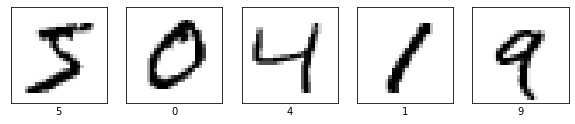

In [3]:
plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(np.argmax(train_labels[i]))

#### Step 2: Building the Model
Remember that the secret sauce of neural networks is *stacking layers*? In code, we take advantage of this secret sauce by constructing several layers and combining them to create a neural network model. Building the model is a two step process that involves 1) stacking layers together using `keras.Sequential`, 2) configuring the loss function, optimizer, and metrics to monitor the model using the keras `compile` method. Loss functions, optimizers, and metrics aren't formally discussed in this lesson. Don't worry too much about them for now. They will be described in detail in a future lesson. The goal of this lesson is to introduce the underlying structure of neural networks, and demonstrate how to build/train/test one in Python. Nonetheless, a quick summary about loss functions, optimizers, and metrics can't hurt:

* **Loss function** - measures how accurate the model is during training, we want to minimize the value this function returns using an optimization method.
* **Optimizer** - defines the optimization method to use to update the model's weights based on the data it sees and its loss function.
* **Metrics** - monitors the model using a set of user-defined metrics; metrics are calculated at the end of every train and test cycle.




**Building the Model - Step 1: Stacking Layers with `keras.Sequential`**

The [3Blue1Brown video](https://www.youtube.com/watch?v=aircAruvnKk&t=436s) used a feed forward neural network with 2 hidden layers to classify handwritten digits. To recreate this neural network, first we need to build a model that 1) takes 784 image pixel feature vectors as input, 2) has 2 hidden layers with 16 neurons and the sigmoid activation function, and 3) includes a final layer with 10 neurons (i.e., there are 10 digit classes so we need 10 neurons) and the *softmax* activation function. The softmax activation function normalizes the activations for the output neurons such that:
- every activation is between 0 and 1
- the sum of all activations is 1

Notice that the softmax activation is similar to the sigmoid activation--neuron activations are squeezed between 0 and 1. Softmax differs from sigmoid by constraining the sum of all activations to 1. For multi-class classification problems, where multiple categories/classes are present in the y variable, it is common to use the softmax activation (or a varient) in the final layer. This is because the softmax activation enables us to treat the final neuron activations as confidence values (i.e., probabilities). The neuron with the largest activation is selected as the category/class prediction.       

Let's see what this looks like in Python code.

In [26]:
# step 1: stack model layers using keras.Sequential
model = keras.Sequential([
    Input(shape=input_shape[1]), # each input is a 784 feature pixel vector
    Dense(16, activation="relu"), # hidden layer 1
    Dense(16, activation='relu'), # hidden layer 2
    Dense(num_classes, activation="softmax"), # final output layer 
])
    
# print the model summary to see its structure and the number of parameters (i.e., weights and biases)
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_7 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_8 (Dense)              (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________
None


**Building the Model - Step 2: Configuring the Loss Function, Optimizer, & Metrics with the Keras `compile` Method**

The model structure is defined in step 1, so most of the building process is finished. But, we still need to configure the model's loss function, optimizer, and metrics using the keras `compile` method. We will use binary cross entropy (BCE) for the loss function, the Adam optimization method, and monitor accuracy, precision, and recall of the model.



In [27]:
# step 2: configure the loss function, optimizer, and model metrics  
model.compile(loss="categorical_crossentropy", # BCE loss 
              optimizer="adam", # Adam optimization
              metrics=["accuracy", keras.metrics.Precision(), keras.metrics.Recall()] # monitor metrics
              )

Now, we can train the model! 

#### Step 3: Training the Model 

Training the neural network model requires the following steps:

1. Feed the training data to the model—in this example, the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. We ask the model to make predictions on a test set—in this example, the `test_images` array. We verify that the predictions match the labels from the `test_labels` array. 

We call the `model.fit` method to train the model—the model is "fit" to the training data:

In [28]:
# fit the model to the data; train for 20 epochs, use batch size 128, and 10% of the training data 
# for validation to model performance during training, and configure the early stopping callback
batch_size = 128
epochs = 20

history = model.fit(train_images, 
                    train_labels, 
                    batch_size=batch_size, 
                    epochs=epochs, 
                    validation_split=0.1)

Epoch 1/20
422/422 [==============================] - 3s 6ms/step - loss: 0.6800 - accuracy: 0.7844 - precision_2: 0.9133 - recall_2: 0.7094 - val_loss: 0.2499 - val_accuracy: 0.9312 - val_precision_2: 0.9477 - val_recall_2: 0.9182
Epoch 2/20
422/422 [==============================] - 2s 5ms/step - loss: 0.2614 - accuracy: 0.9234 - precision_2: 0.9395 - recall_2: 0.9092 - val_loss: 0.1937 - val_accuracy: 0.9468 - val_precision_2: 0.9584 - val_recall_2: 0.9358
Epoch 3/20
422/422 [==============================] - 2s 5ms/step - loss: 0.2171 - accuracy: 0.9365 - precision_2: 0.9489 - recall_2: 0.9259 - val_loss: 0.1697 - val_accuracy: 0.9523 - val_precision_2: 0.9613 - val_recall_2: 0.9447
Epoch 4/20
422/422 [==============================] - 2s 5ms/step - loss: 0.1930 - accuracy: 0.9426 - precision_2: 0.9530 - recall_2: 0.9341 - val_loss: 0.1611 - val_accuracy: 0.9567 - val_precision_2: 0.9632 - val_recall_2: 0.9517
Epoch 5/20
422/422 [==============================] - 2s 5ms/step - loss

**Challenge:** As the model is trained, the loss and metrics are displayed. What is the final precision score on the training data?

Now that we finished training, let's view the results. We'll use the Pandas library to store the training history in a dataframe.  

In [30]:
# store the training history in a dataframe
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# see what the hist dataframe looks like
hist

,loss,accuracy,precision_2,recall_2,val_loss,val_accuracy,val_precision_2,val_recall_2,epoch
0,0.679976,0.784389,0.913339,0.709444,0.249939,0.931167,0.947703,0.918167,0
1,0.261373,0.923407,0.939494,0.909204,0.193705,0.946833,0.958355,0.935833,1
2,0.217145,0.936500,0.948908,0.925870,0.169727,0.952333,0.961330,0.944667,2
3,0.192977,0.942593,0.953010,0.934056,0.161091,0.956667,0.963225,0.951667,3
4,0.175471,0.947870,0.956694,0.939704,0.157114,0.955667,0.963959,0.949500,4
5,0.164933,0.950130,0.958783,0.942963,0.150403,0.959333,0.965907,0.953833,5
6,0.155793,0.952722,0.960233,0.946630,0.151075,0.958500,0.963805,0.954167,6
7,0.150378,0.954500,0.961834,0.948796,0.153189,0.961000,0.965198,0.956833,7
8,0.144766,0.956093,0.962805,0.950093,0.148160,0.960833,0.965517,0.956667,8
9,0.137778,0.958926,0.965326,0.953259,0.144593,0.961000,0.966179,0.957000,9


Now, let's plot the loss function measure on the training and validation sets. The validation set is used to prevent overfitting ([learn more about it here](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit)). However, because our network is small, the training converges (i.e., reaches an optimal loss value) without noticeably overfitting the data as the plot shows.

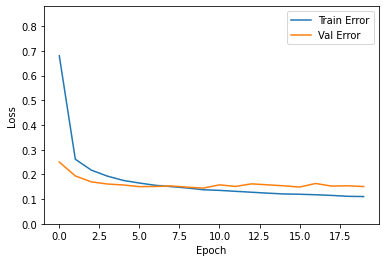

In [31]:
def plot_loss():
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_loss'], label = 'Val Error')
    plt.legend()
    plt.ylim([0,max(hist['loss'].max()+0.2, hist['val_loss'].max()+0.2)])

plot_loss()

Now, let's plot accuracy metric on the training and validation set. Similar to the loss metric, we expect the validation accuracy to be a bit lower than the training accuracy. If the validation accuracy is noticeably different than the training one, we might want to do some more analysis. When the validation accuracy is much lower than the training accuracy, the model could be overfitting. When the it is much higher than the training accuracy, the model could be underfitting (this happens less often). However, the plot suggests the model is not overfitting/underfitting the data.         

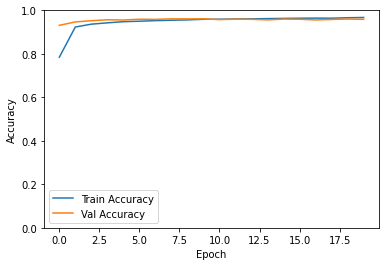

In [32]:
def plot_accuracy():
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label = 'Val Accuracy')
    plt.legend()
    plt.ylim([0,1])

plot_accuracy()

#### Step 4: Testing the Model
Our results on the training and validation data look promising, but we want to know whether our model performs well on unknown data. For this, we compare how the model performs on the test dataset:

In [33]:
print(test_images.shape)
test_loss, test_acc, test_prec, test_rec = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

(10000, 784)
313/313 [==============================] - 1s 4ms/step - loss: 0.1632 - accuracy: 0.9549 - precision_2: 0.9594 - recall_2: 0.9521
Test accuracy: 0.9549000263214111


Let's take a look at a few sample that the network classified incorrectly.

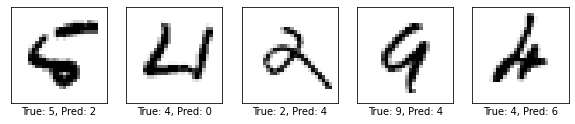

In [34]:
predictions = np.argmax(model.predict(test_images, batch_size=32), axis=-1)
is_correct = predictions == np.argmax(test_labels, axis=-1)

misclassified_indices = np.argwhere(is_correct == False)

def plot_misclassified(imgs, labels, preds, misclassified_indices, n=5):
  plt.figure(figsize=(10,3))
  for i, idx in enumerate(misclassified_indices[:n]):
    plt.subplot(1, n, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imgs[idx].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(f'True: {np.argmax(labels[idx])}, Pred: {preds[idx][0]}')

plot_misclassified(test_images, test_labels, predictions, misclassified_indices)

We can see that some of these digits are hard to recognize, even for a human!

Often times, the accuracy on the test dataset is a little less than the accuracy on the training dataset. Small differences are ok, but we don't want the test results to differ significantly from the training results--this suggests the model is overfitting/underfitting. 

**Challenge:** Do you think the difference between the training accuracy and the testing accuracy is significant? Is the model overfitting? Is it underfitting? Are the misclassify images justifiably misclassified (i.e., does it make sense that the model misclassified them)?

## Recap
You made it! We covered a lot of material in this lesson. Don't worry if it doesn't all make sense yet. The concepts will become more intuitive as you practice building, training, and testing your own neural network models. 

Let's summarize what we learned about neural networks:
- Neural Networks are popular and successful machine learning models that can learn effective representations from data (i.e., images, text, sound). They can and *classification* tasks (see [Part 2](#-Part-2:-Classification-of-MNIST-Digits-with-Convolutional-Neural-Networks)), and also to generate images, text, videos, and sound.  
- Special libraries like Tensorflow and Pytorch enable us to build neural networks in Python and train them on accelerated hardware like GPUs and TPUs. 
- Several steps are involved in making an effective neural network: 
  1. Loading the dataset
  2. Building the model--stacking several layers and configuring the loss function, optimizer, and metrics.
  3. Training the model--fitting the model on the training data.
  4. Evaluating/Testing the model--evaluating the model on the testing data. 
- Once a model is trained, it can be used to make predictions on outside data (see [Part 2, Step 5](#-Step-5:-Make-predictions-on-outside-data)).  

#### Acknowlegements
- [MIT Deep Learning Basics](https://www.youtube.com/watch?v=O5xeyoRL95U&list=PLrAXtmErZgOeiKm4sgNOknGvNjby9efdf)
- [Dive into Deep Learning](https://d2l.ai/index.html)